In [28]:

import os
import numpy as np
import math

import torchvision.transforms as transforms
from torchvision.utils import save_image,make_grid

from torch.utils.data import DataLoader
import torchvision.utils as vutils
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:


n_epochs=200
batch_size=64
lr=0.0002
b1=0.5
b2=0.999
n_cpu=8
latent_dim=100
n_classes=10
img_size=32
channels=1
sample_interval=10000

img_shape = (channels, img_size, img_size)


FloatTensor =  torch.cuda.FloatTensor
LongTensor = torch.cuda.LongTensor

In [3]:


class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.label_emb = nn.Embedding(n_classes, n_classes)

        def block(in_feat, out_feat, normalize=True):
            layers = [  nn.Linear(in_feat, out_feat)]
            if normalize:
                layers.append(nn.BatchNorm1d(out_feat, 0.8))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return layers

        self.model = nn.Sequential(
            *block(latent_dim+n_classes, 128, normalize=False),
            *block(128, 256),
            *block(256, 512),
            *block(512, 1024),
            nn.Linear(1024, int(np.prod(img_shape))),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        # Concatenate label embedding and image to produce input
        gen_input = torch.cat((self.label_emb(labels), noise), -1)
        img = self.model(gen_input)
        img = img.view(img.size(0), *img_shape)
        return img

In [52]:
generator = Generator()

generator = torch.load("models/generator191_.pt")
generator.eval()

Generator(
  (label_emb): Embedding(10, 10)
  (model): Sequential(
    (0): Linear(in_features=110, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace)
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): BatchNorm1d(256, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace)
    (5): Linear(in_features=256, out_features=512, bias=True)
    (6): BatchNorm1d(512, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace)
    (8): Linear(in_features=512, out_features=1024, bias=True)
    (9): BatchNorm1d(1024, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace)
    (11): Linear(in_features=1024, out_features=1024, bias=True)
    (12): Tanh()
  )
)

(1, 32, 32)


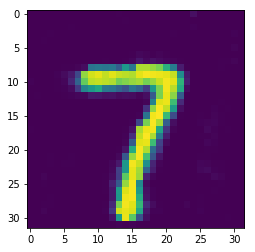

In [53]:
z = Variable(FloatTensor(np.random.normal(0, 1, (1,latent_dim ))))
labels = Variable(LongTensor([7]))
gen_imgs = generator(z, labels)
npimg = gen_imgs.data[0].cpu().numpy()
print(npimg.shape)
plt.imshow(npimg[0], interpolation='nearest')
plt.show()


[2 4 6 8]


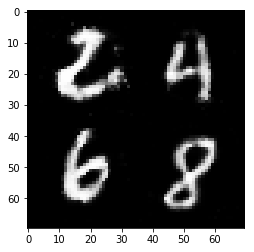

In [58]:
z = Variable(FloatTensor(np.random.normal(0, 1, (2**2, latent_dim))))
# Get labels ranging from 0 to n_classes for n rows
labels = np.array([2,4,6,8])
print(labels)
labels = Variable(LongTensor(labels))
gen_imgs = generator(z, labels)
grid = vutils.make_grid(gen_imgs, nrow=2, normalize=True, scale_each=True)
npimg=grid.cpu().detach().numpy()
plt.imshow( np.transpose(npimg, (1,2,0)), interpolation='nearest')
plt.show()